In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [14]:
df = pd.read_csv("StudentsPerformance.csv")

df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


<style> b {text-align: left;color: lightgreen;} </style>
<b>Overall Objective:</b>
<p>To conduct a comprehensive analysis of student academic outcomes to understand how various intrinsic and extrinsic factors influence performance.

<b>Key Goals: </b>
- Quantify the Impact of Interventions: Measure the effectiveness of the Test Preparation Course across all subjects.
- Analyze Socioeconomic and Demographic Influence: Determine the relationship between Parental Level of Education, Lunch Type (as a socioeconomic proxy), and Race/Ethnicity on average subject scores and performance distribution.
- Identify Performance Disparities: Quantify the gender gap in performance and track how this gap changes across different levels of parental education.
- Establish Internal Relationships: Determine the correlation strength between the three core subject scores (Math, Reading, Writing).</p>

<p style="font-weight: 900;">Question 1:</p>
<style> h3 {text-align: left;color: yellow;} </style>
<h3>How does the average score compare between students who completed the test preparation course versus those who did not?</h3>

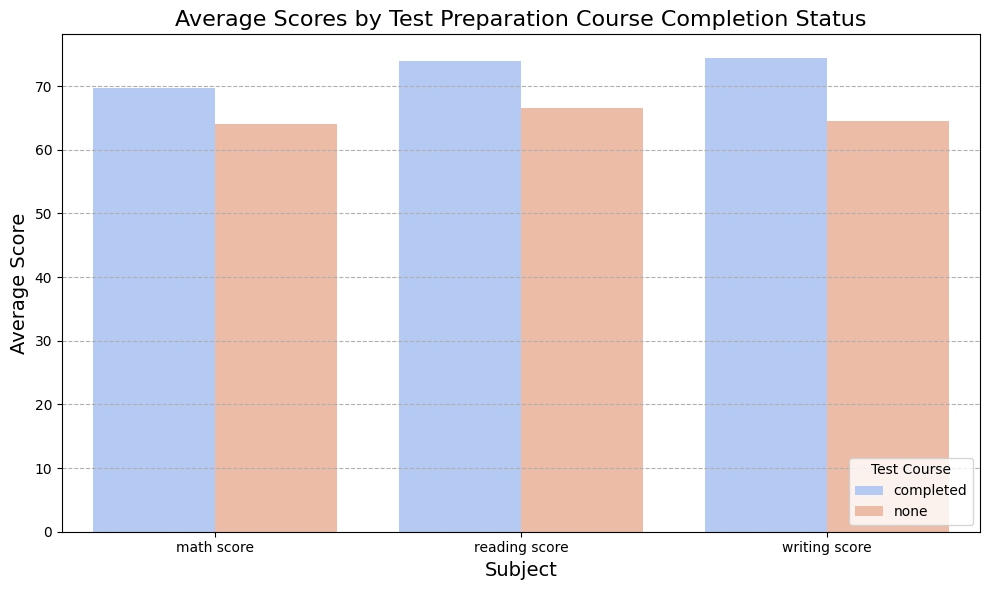

In [10]:
df_grouped = df.groupby('test preparation course')[
    ['math score', 'reading score', 'writing score']
].mean().reset_index()

df_melted = df_grouped.melt(
    id_vars='test preparation course', 
    var_name='Subject', 
    value_name='Average Score'
)

#Grouped Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_melted, 
    x='Subject', 
    y='Average Score', 
    hue='test preparation course', 
    palette='coolwarm'
)

plt.title('Average Scores by Test Preparation Course Completion Status', fontsize=16)
plt.xlabel('Subject', fontsize=14)
plt.ylabel('Average Score', fontsize=14)
plt.legend(title='Test Course', loc='lower right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show() 


<p><b>Insights:</b><br>
Based on this visualization, it shows that students who completed the test preparation course consistently achieved higher average scores across all three subjects, with the difference being most pronounced in writing and reading scores, where completers scored approximately 9 to 10 points higher than non-completers. This suggests that completing the test preparation course has a significant positive impact on a student's overall test performance.</p>

<p style="font-weight: 900;">Question 2:</p>
<style> h3 {text-align: left;color: yellow;} </style>
<h3>What is the distribution of overall academic performance across the different parental levels of education?</h3>

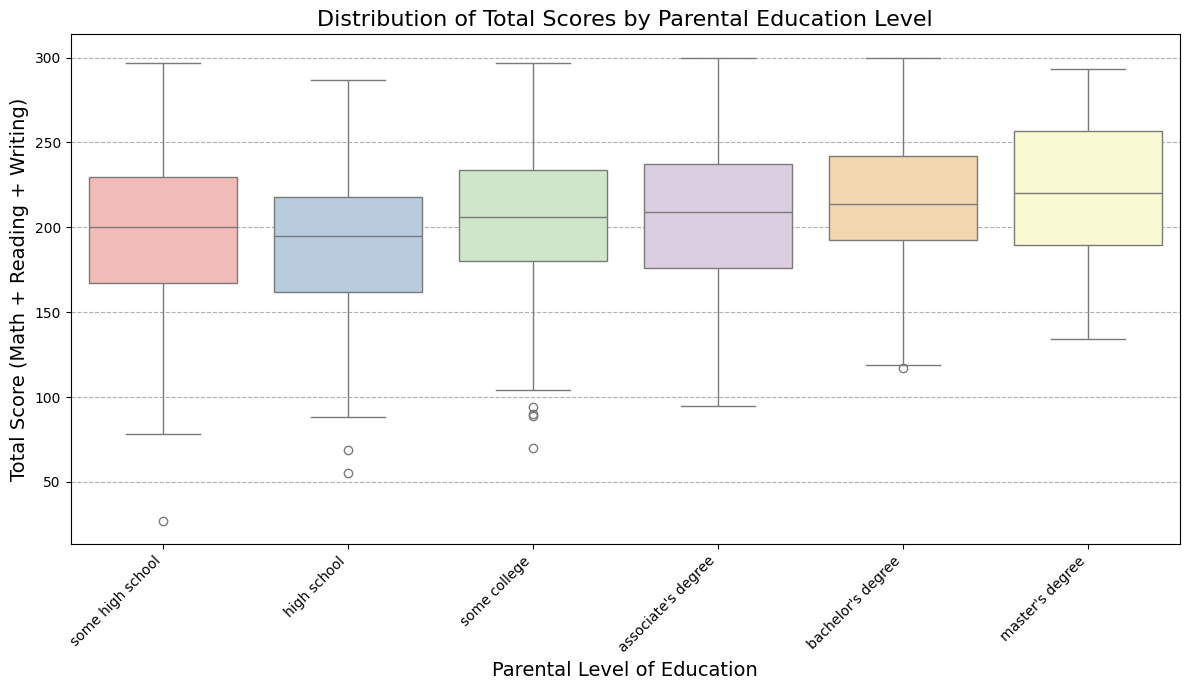

In [16]:
df['Total Score'] = df['math score'] + df['reading score'] + df['writing score']

education_order = [
    "some high school",
    "high school",
    "some college",
    "associate's degree",
    "bachelor's degree",
    "master's degree"
]

#Box Plot
plt.figure(figsize=(12, 7))
sns.boxplot(
    data=df, 
    x='parental level of education', 
    y='Total Score', 
    order=education_order, 
    palette='Pastel1'
)

plt.title('Distribution of Total Scores by Parental Education Level', fontsize=16)
plt.xlabel('Parental Level of Education', fontsize=14)
plt.ylabel('Total Score (Math + Reading + Writing)', fontsize=14)
plt.xticks(rotation=45, ha='right') 
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show() 

<p><b>Insights:</b><br>
Based on this visualization, it shows a clear positive correlation between a parent's highest education level and a student's total score. As the parental education level increases from "some high school" to "master's degree," the median total score consistently rises, suggesting that the educational background of parents is a strong predictor of student performance.</p>

<p style="font-weight: 900;">Question 3:</p>
<style> h3 {text-align: left;color: yellow;} </style>
<h3>Is there a correlation between a student's math score and their writing score?</h3>

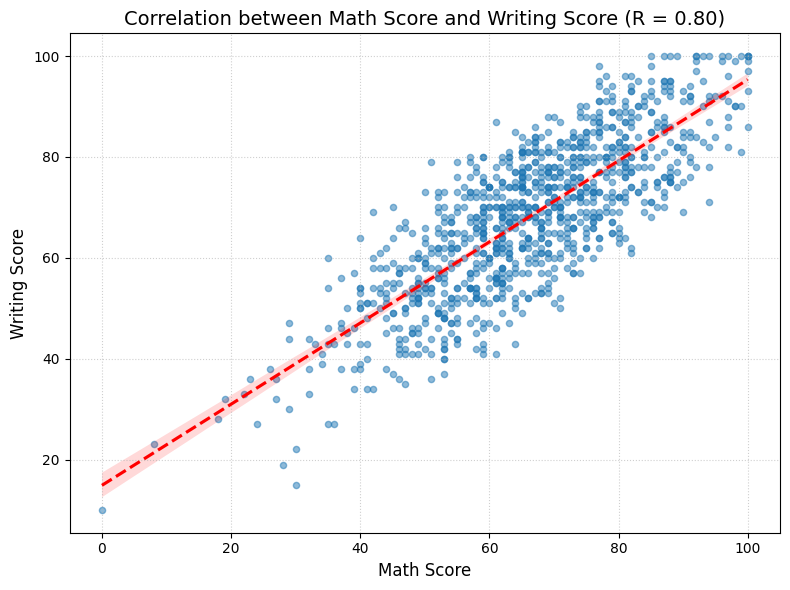

In [17]:
correlation_r = df['math score'].corr(df['writing score'])

#Scatter Plot with a Trendline 
plt.figure(figsize=(8, 6))
sns.regplot(
    data=df, 
    x='math score', 
    y='writing score', 
    scatter_kws={'alpha':0.5, 's':20}, 
    line_kws={'color':'red', 'linestyle':'--'} 
)

plt.title(f'Correlation between Math Score and Writing Score (R = {correlation_r:.2f})', fontsize=14)
plt.xlabel('Math Score', fontsize=12)
plt.ylabel('Writing Score', fontsize=12)
plt.grid(True, linestyle=':', alpha=0.6)
plt.tight_layout()
plt.show() 

<p><b>Insights:</b><br>
Based on this visualization, it shows that the visualization confirms a very strong positive linear correlation R=0.80 between mathematics scores and writing scores. The data points cluster tightly around the upward-sloping red trendline, indicating that students who score high in mathematics are highly likely to score high in writing, suggesting a strong dependency on a common underlying aptitude.</p>

<p style="font-weight: 900;">Question 4:</p>
<style> h3 {text-align: left;color: yellow;} </style>
<h3>What is the gender breakdown of students within each race/ethnicity group?</h3>

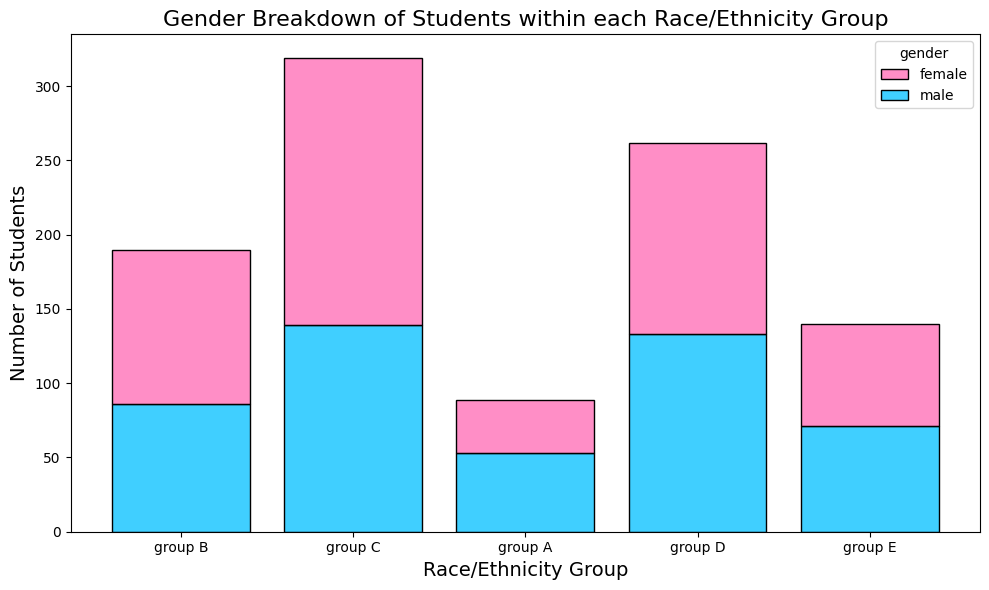

In [18]:
gender_palette = {'female': '#FF69B4', 'male': '#00BFFF'} 

#Stacked Bar Chart 
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df, 
    x='race/ethnicity', 
    hue='gender', 
    multiple='stack', 
    palette=gender_palette,
    shrink=0.8
)

plt.title('Gender Breakdown of Students within each Race/Ethnicity Group', fontsize=16)
plt.xlabel('Race/Ethnicity Group', fontsize=14)
plt.ylabel('Number of Students', fontsize=14)
plt.tight_layout()
plt.show() 

<p><b>Insights:</b><br>
Based on this visualization, it shows that Group C is the largest demographic, containing the highest total number of students, and while the gender split is generally balanced across most groups, Group C and Group B show a notably higher number of female students, whereas other groups (A, D, and E) are more closely balanced or show a slight male majority.</p>

<p style="font-weight: 900;">Question 5:</p>
<style> h3 {text-align: left;color: yellow;} </style>
<h3>How do the average scores across all three subjects (math, reading, and writing) compare among the different race/ethnicity groups?</h3>

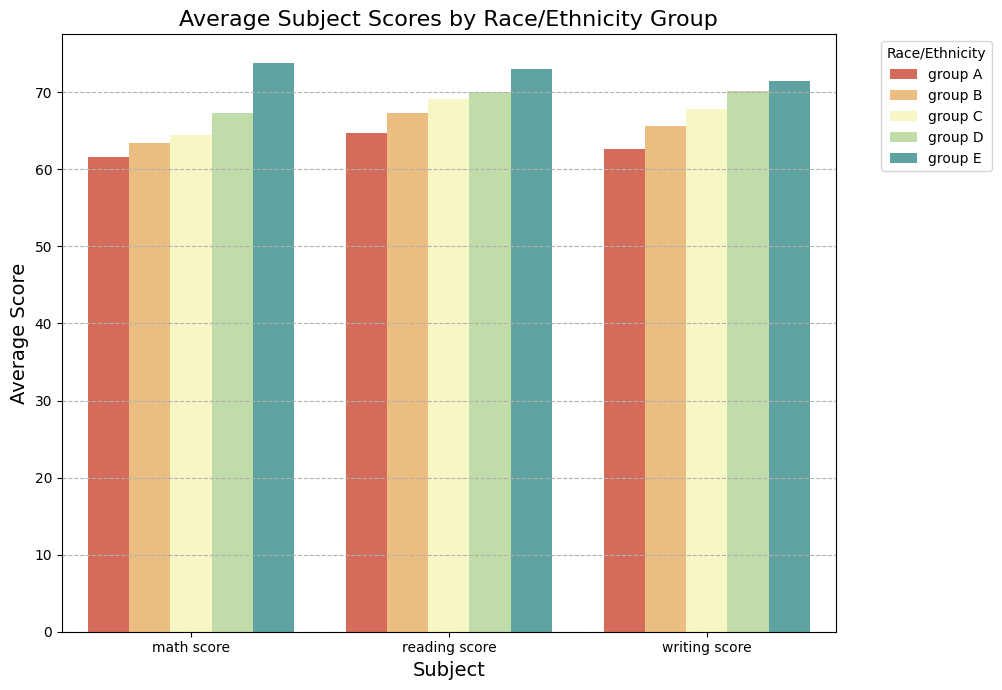

In [19]:
df_grouped_race = df.groupby('race/ethnicity')[
    ['math score', 'reading score', 'writing score']
].mean().reset_index()

df_melted_race = df_grouped_race.melt(
    id_vars='race/ethnicity', 
    var_name='Subject', 
    value_name='Average Score'
)

#Grouped Bar Chart
plt.figure(figsize=(12, 7))
sns.barplot(
    data=df_melted_race, 
    x='Subject', 
    y='Average Score', 
    hue='race/ethnicity', 
    palette='Spectral'
)

plt.title('Average Subject Scores by Race/Ethnicity Group', fontsize=16)
plt.xlabel('Subject', fontsize=14)
plt.ylabel('Average Score', fontsize=14)

plt.legend(title='Race/Ethnicity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--')
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show() 

<p><b>Insights:</b><br>
Based on this visualization, it shows that the Grouped Bar Chart clearly reveals a significant disparity in average scores across the different race/ethnicity groups, with Group E consistently achieving the highest average scores in all three subjects (particularly in math) and Group A recording the lowest averages. Furthermore, the overall pattern shows that average reading and writing scores are generally higher than math scores across every group.</p>

<b>Question 6:</b>
<style> h3 {text-align: left;color: yellow;} </style>
<h3>What is the overall distribution (density) of the math score compared to the reading score and writing score for all students?</h3>

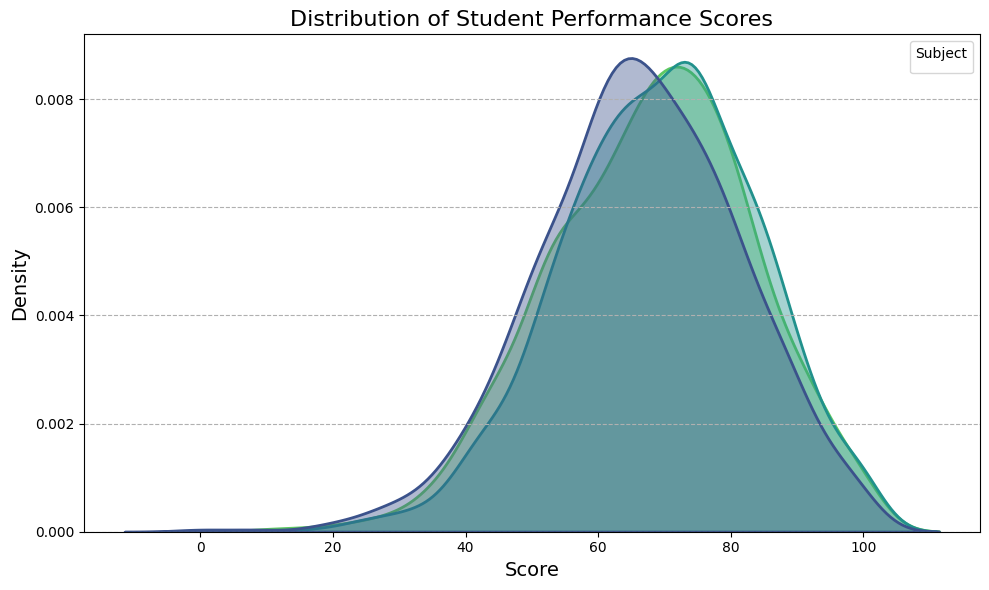

In [26]:
df_scores_melted = df.melt(
    value_vars=['math score', 'reading score', 'writing score'],
    var_name='Subject', 
    value_name='Score'
)

#Density Plot (KDE Plot)
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=df_scores_melted, 
    x='Score', 
    hue='Subject', 
    fill=True, 
    alpha=0.4, 
    linewidth=2,
    palette='viridis'
)

plt.title('Distribution of Student Performance Scores', fontsize=16)
plt.xlabel('Score', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.grid(axis='y', linestyle='--')
plt.legend(title='Subject')
plt.tight_layout()
plt.show() 

<p><b>Insights:</b><br>
Based on the visualization, it shows that student performance is highest and most consistent in the reading and writing scores, as their density curves overlap closely and are centralized around higher scores. In contrast, the density curve for the math score is shifted significantly to the left and has a lower peak, indicating that students generally perform worse in mathematics, and the scores are more spread out (higher variance). </p>

<b>Question 7:</b>
<style> h3 {text-align: left;color: yellow;} </style>
<h3>What is the proportional breakdown (percentage) of students across the five race/ethnicity groups in the dataset?</h3>

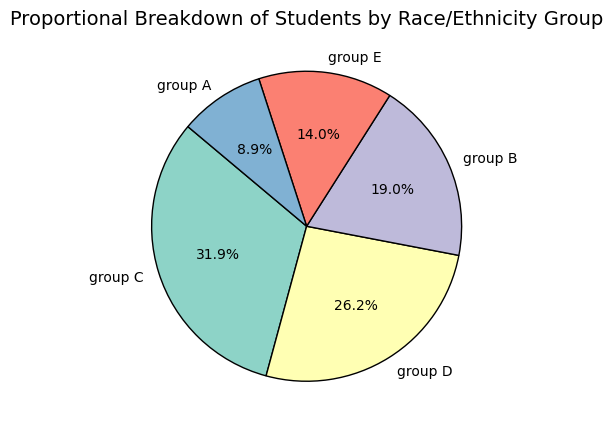

In [25]:
race_counts = df['race/ethnicity'].value_counts()

#Pie Chart
plt.figure(figsize=(5, 8))
plt.pie(
    race_counts, 
    labels=race_counts.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=plt.cm.Set3.colors,
    wedgeprops={'edgecolor': 'black'} 
)

plt.title('Proportional Breakdown of Students by Race/Ethnicity Group', fontsize=14)
plt.show() 

<p><b>Insights:</b><br>
Based on the visualization, it shows that Group C is the largest demographic, accounting for nearly a third of all students at 31.9%. Conversely, Group A is the smallest, representing only 8.9% of the student body, highlighting a significant imbalance in the proportional representation across the different race/ethnicity groups.</p>

<b>Question 8:</b>
<style> h3 {text-align: left;color: yellow;} </style>
<h3>How does the average total score (Math + Reading + Writing) change as the parental level of education increases, and does this trend differ by gender?</h3>

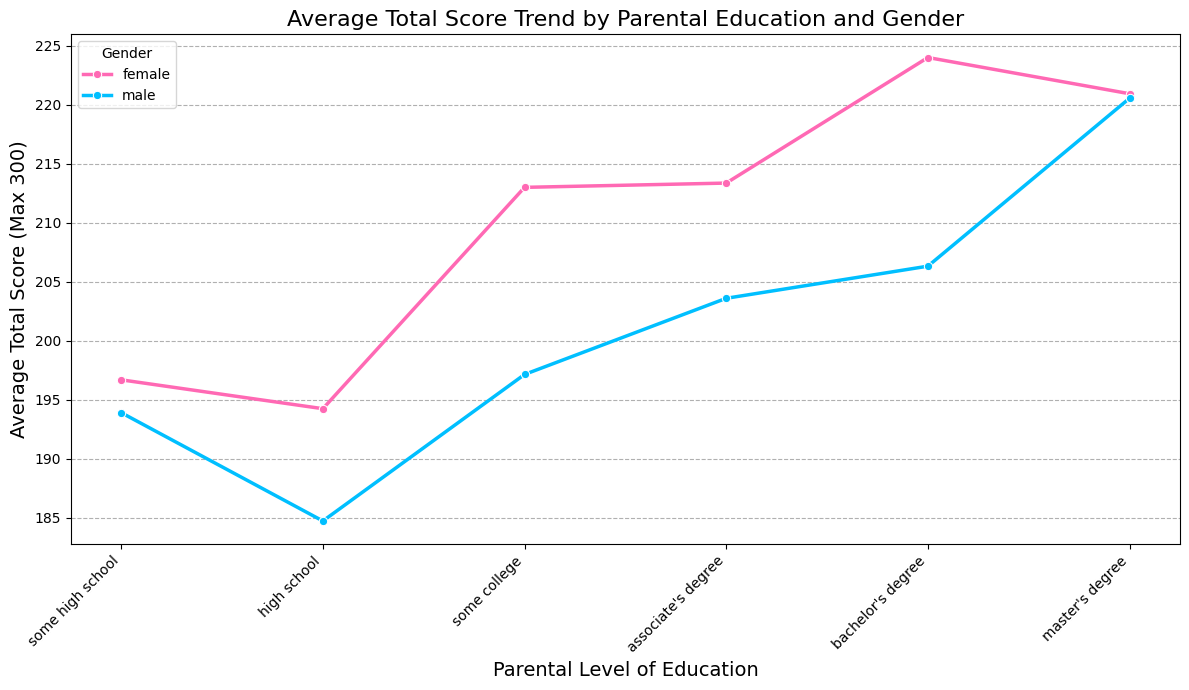

In [27]:
education_order = [
    "some high school",
    "high school",
    "some college",
    "associate's degree",
    "bachelor's degree",
    "master's degree"
]

df_trend = df.groupby(['parental level of education', 'gender'])['Total Score'].mean().reset_index()
df_trend['parental level of education'] = pd.Categorical(
    df_trend['parental level of education'], 
    categories=education_order, 
    ordered=True
)
df_trend = df_trend.sort_values('parental level of education')

#Line Chart
plt.figure(figsize=(12, 7))
sns.lineplot(
    data=df_trend, 
    x='parental level of education', 
    y='Total Score', 
    hue='gender', 
    marker='o',
    palette={'female': '#FF69B4', 'male': '#00BFFF'},
    linewidth=2.5
)

plt.title('Average Total Score Trend by Parental Education and Gender', fontsize=16)
plt.xlabel('Parental Level of Education', fontsize=14)
plt.ylabel('Average Total Score (Max 300)', fontsize=14)
plt.xticks(rotation=45, ha='right') 
plt.grid(axis='y', linestyle='--')
plt.legend(title='Gender')
plt.tight_layout()
plt.show() 

<p><b>Insights:</b><br>
Based on the visualization, it shows that increasing parental education level is strongly and positively correlated with higher average student total scores, as the scores generally climb from "some high school" up to the "bachelor's degree" level. Additionally, female students consistently outperform male students in the average total score across every parental education level, though this gender gap significantly narrows at the master's degree level. </p>

<b>Question 9:</b>
<style> h3 {text-align: left;color: yellow;} </style>
<h3>Is there a relationship between the level of parental education and the student's access to standard vs. free/reduced lunch?</h3>

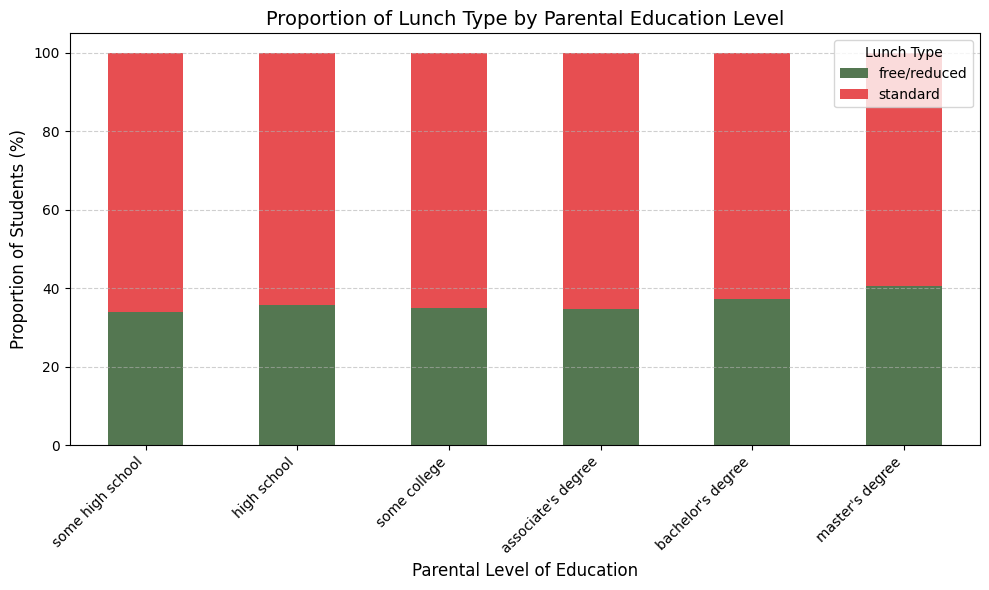

In [35]:
df_crosstab = pd.crosstab(df['parental level of education'], df['lunch'])
# Normalize across the index (rows) to get proportions (%)
df_normalized = df_crosstab.div(df_crosstab.sum(axis=1), axis=0) * 100
df_normalized = df_normalized.reindex(education_order)

#Normalized Stacked Bar Chart
plt.figure(figsize=(10, 6))
df_normalized.plot(
    kind='bar', 
    stacked=True, 
    figsize=(10, 6),
    color=["#547751", "#e74e51"], # Green for standard, Red for free/reduced
    ax=plt.gca() 
)

plt.title('Proportion of Lunch Type by Parental Education Level', fontsize=14)
plt.xlabel('Parental Level of Education', fontsize=12)
plt.ylabel('Proportion of Students (%)', fontsize=12)
plt.xticks(rotation=45, ha='right') 
plt.legend(title='Lunch Type', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show() 

<p><b>Insights:</b><br>
Based on the visualization, it shows that access to free/reduced lunch is not simply inversely correlated with parental education level, as students whose parents have a master's degree have the highest proportion of free/reduced lunch recipients (over 40%). Conversely, students whose parents have high school or some college education levels are slightly more likely to receive standard lunch.</p>

<b>Question 10:</b>
<style> h3 {text-align: left;color: yellow;} </style>
<h3>How does the average math score change across different parental level of education categories and the test preparation course completion status?</h3>

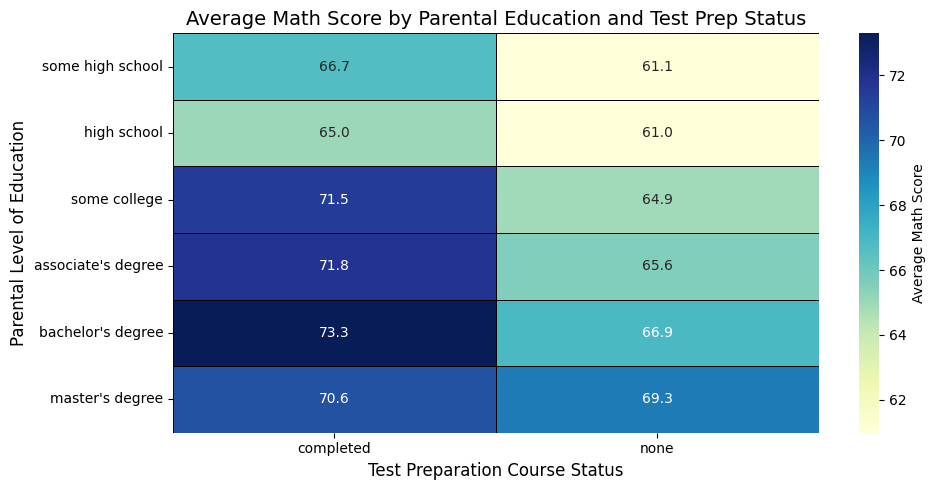

In [39]:
df_heatmap_data = df.groupby(['parental level of education', 'test preparation course'])['math score'].mean().unstack()
df_heatmap_data = df_heatmap_data.reindex(education_order)

#Heat Map
plt.figure(figsize=(10, 5))
sns.heatmap(
    df_heatmap_data, 
    annot=True, 
    fmt=".1f", 
    cmap="YlGnBu", 
    linewidths=.5, 
    linecolor='black',
    cbar_kws={'label': 'Average Math Score'} 
)

plt.title('Average Math Score by Parental Education and Test Prep Status', fontsize=14)
plt.xlabel('Test Preparation Course Status', fontsize=12)
plt.ylabel('Parental Level of Education', fontsize=12)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

<p><b>Insights:</b><br>
Based on the visualization, it shows that completing the test preparation course leads to a significantly higher average math score for students at virtually every level of parental education (the scores are consistently higher in the "completed" column). The highest overall average score (73.3) belongs to students who completed the course and whose parents have a bachelor's degree, while the lowest (61.0) belongs to students who did not take the course and whose parents have only some high school education.</p>

<style> b {text-align: left;color: lightgreen;} </style>
<b>Conclusion:</b>
<p>Based on these ten visualizations, the overall analysis conclusively demonstrates that <em>student academic performance is a complex outcome</em> strongly shaped by intervention, socioeconomic background, and intrinsic subject dependencies. The most effective single factor is the <em>Test Preparation Course</em>, which consistently results in significantly higher average scores across all subjects. However, powerful demographic predictors reveal major disparities: <em>Parental Education is a strong positive correlate of student achievement</em>, and there are significant <em>differences in average scores across race/ethnicity groups</em> (Group E generally highest, Group A lowest), reflecting uneven performance distributions across the student population. Furthermore, <em>female students consistently maintain a higher average total score</em> across nearly all parental education levels, while the strong linear correlation (R=0.80) between <em>Math and Writing scores</em> suggests a high degree of common underlying academic aptitude is at play. </p><br>
<b>Reference:</b><br>
<u>https://www.kaggle.com/datasets/sadiajavedd/students-academic-performance-dataset</u>